In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import math
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.stats as st

In [60]:
#put the data into a dataframe
AEX_data = pd.read_csv('AEX.csv')
AEX_data_df = pd.DataFrame(AEX_data)
AEX_data_df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-09-02,434.630005,438.260010,429.679993,433.559998,0,433.559998
1,2015-09-01,439.950012,441.549988,430.029999,433.529999,0,433.529999
2,2015-08-31,442.390015,446.029999,440.390015,445.029999,0,445.029999
3,2015-08-28,445.290009,446.059998,440.399994,445.959991,0,445.959991
4,2015-08-27,440.209991,445.850006,437.200012,443.359985,0,443.359985
...,...,...,...,...,...,...,...
5831,1992-10-16,278.250019,278.720024,275.150007,275.970006,0,125.230297
5832,1992-10-15,277.880018,278.919996,276.979990,277.280016,0,125.824757
5833,1992-10-14,277.790018,278.890019,277.669991,278.739998,0,126.487270
5834,1992-10-13,279.369994,279.879996,278.750018,279.540022,0,126.850307


In [61]:
#add date time column (easier to work with)
AEX_data_df['DateTime'] = pd.to_datetime(AEX_data_df['Date'])

Text(0.5, 1.0, 'Closing price')

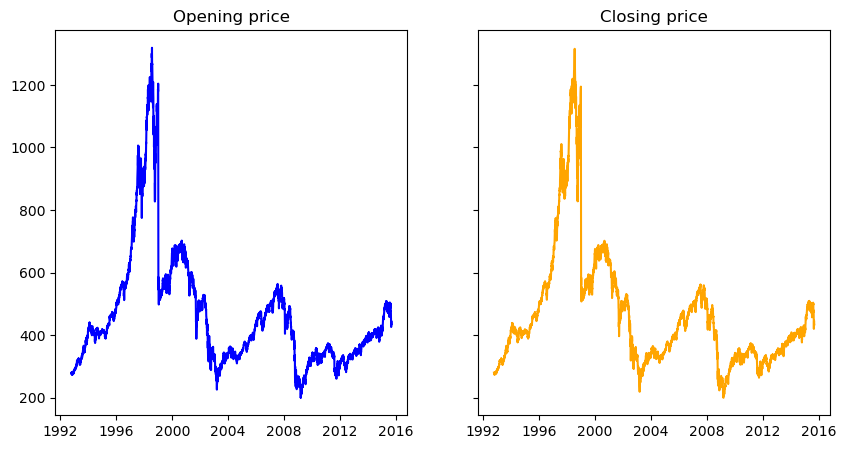

In [62]:
#Part 1
#a) Plot opening and closing in function of time
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5), sharey = True)
ax[0].plot(AEX_data_df['DateTime'], AEX_data_df['Open'], label = 'Opening', color = 'blue')
ax[1].plot(AEX_data_df['DateTime'], AEX_data_df['Close'], label = 'Closing', color = 'orange')
ax[0].set_title('Opening price')
ax[1].set_title('Closing price')

#data shows a massive bull market from 1995 to 2000
#what happended there was the dot-com bubble

In [63]:
#c) calculate the daily return
AEX_data_df['DailyReturn'] = (AEX_data_df['Close']-AEX_data_df['Open'])/AEX_data_df['Open']


Text(0.5, 1.0, 'Daily Return')

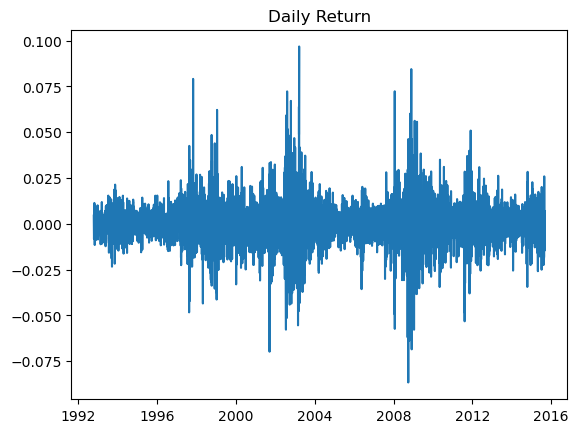

In [64]:
#plot the daily return
plt.plot(AEX_data_df['DateTime'], AEX_data_df['DailyReturn'], label='Daily Return')
plt.title('Daily Return')

Text(0.5, 1.0, 'Histogram of daily return')

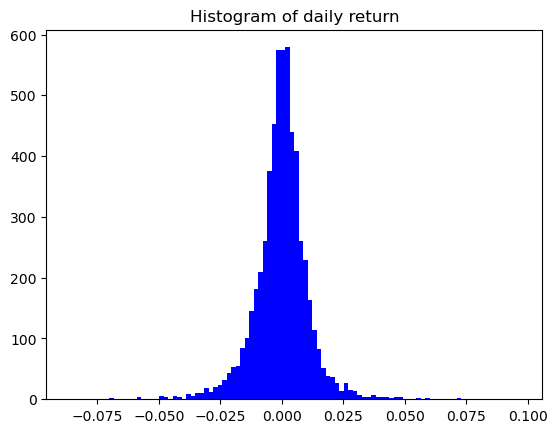

In [65]:
plt.hist(AEX_data_df['DailyReturn'], bins = 100, color = 'blue')
plt.title('Histogram of daily return')

In [66]:
AEX_data_df['DailyReturn'].describe()

count    5836.000000
mean       -0.000088
std         0.011292
min        -0.086585
25%        -0.005107
50%         0.000261
75%         0.005409
max         0.096766
Name: DailyReturn, dtype: float64

In [67]:
AEX_data_df['DailyReturn'].var()

0.0001275134424283555

Text(0.5, 1.0, 'QQ plot of daily return')

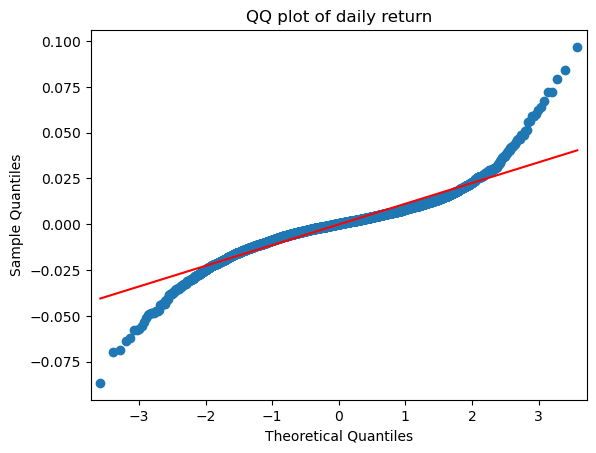

In [68]:
#d) check if the daily return is indepenent and identically distributed
#we check normal distribution by using qqplot

sm.qqplot(AEX_data_df['DailyReturn'], line='s')
plt.title('QQ plot of daily return')

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,
          0.,   1.,   1.,   0.,   3.,   0.,   1.,   1.,   1.,   5.,   4.,
          0.,   6.,   3.,   1.,   8.,   6.,  10.,  11.,  19.,  12.,  20.,
         24.,  31.,  44.,  53.,  55.,  84., 101., 145., 181., 210., 261.,
        376., 453., 575., 574., 579., 440., 409., 260., 229., 163., 114.,
         82.,  52.,  38.,  37.,  27.,  13.,  26.,  15.,  13.,   7.,   4.,
          3.,   7.,   4.,   3.,   4.,   2.,   4.,   3.,   1.,   1.,   0.,
          2.,   0.,   2.,   1.,   1.,   1.,   1.,   0.,   0.,   2.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-0.08658464, -0.08475114, -0.08291763, -0.08108412, -0.07925061,
        -0.0774171 , -0.07558359, -0.07375008, -0.07191657, -0.07008306,
        -0.06824955, -0.06641604, -0.06458253, -0.06274902, -0.06091552,
        -0.05908201, -0.0572485 , -0.05541499, -0.05358148, -0.05174797,
        -0.04991446, -0.04

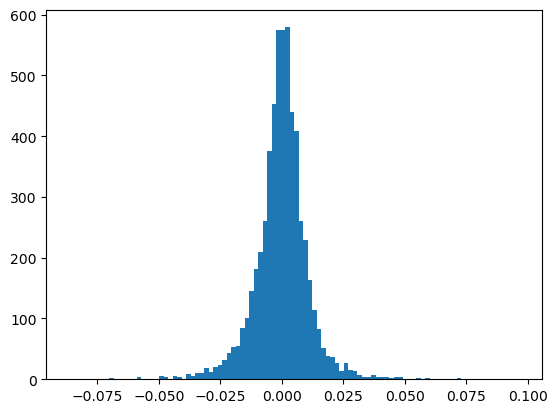

In [69]:
#plot histogram of daily return
plt.hist(AEX_data_df['DailyReturn'], bins=100)

In [70]:
#Part 2
# reduce the data to the period 2004-2006
AEX_data_df_2004_2006 = AEX_data_df[(AEX_data_df['DateTime'] > '2004-01-01') & (AEX_data_df['DateTime'] < '2006-12-31')]

In [71]:
#e) 
#implement AutoCorrelation Function
def acf_manual(Dataframe, k, column):
    #calculate the mean of the data as Decimal
    mean = Dataframe[column].mean()
    #calculate the variance of the data as Decimal
    variance = Dataframe[column].var()
    #lenght of the data
    n = len(Dataframe[column])
    sum = 0
    for i in range(0, n-k):
        #calculate the sum of the data
        sum += (Dataframe[column].iloc[i] - mean)*(Dataframe[column].iloc[i+k]-mean)
    return sum/((n-k-1)*variance)


C:\Users\frank\AppData\Local\Temp\ipykernel_15236\3881931233.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  return sum/((n-k-1)*variance)


Text(0.5, 1.0, 'ACF of daily return (manual implementation)')

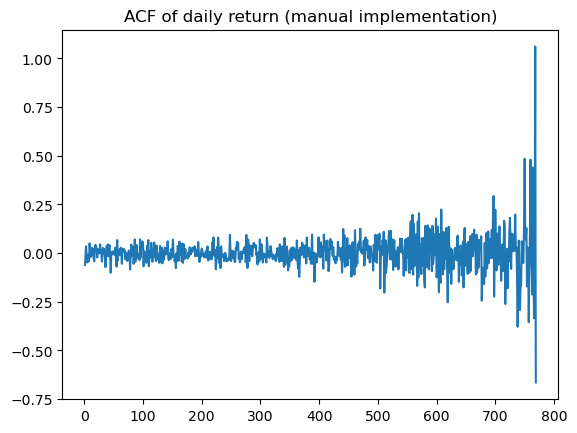

In [73]:
#plot ACF in function of k
n = len(AEX_data_df_2004_2006.index)
k = np.arange(1, n)
ACF = []
for i in k:
    ACF.append(acf_manual(AEX_data_df_2004_2006, i, 'DailyReturn'))
plt.plot(k, ACF)
plt.title('ACF of daily return (manual implementation)')

Text(0.5, 1.0, 'ACF of daily return (statsmodels implementation)')

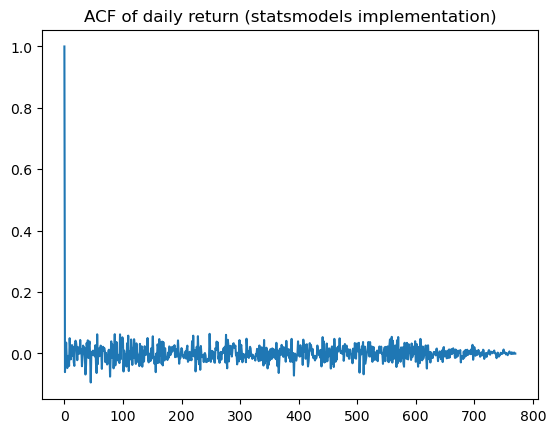

In [74]:
#use acf function from statsmodels

n = len(AEX_data_df_2004_2006.index)
array = acf(AEX_data_df_2004_2006['DailyReturn'], nlags = n-1)
plt.plot(array)
plt.title('ACF of daily return (statsmodels implementation)')

In [76]:
#Looking through documentation of acf function
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.acf.html
#acf function returns the biased autocorrelation function if we set adjusted = True
#the acf returns a similar plot as the one we made ourselves

Text(0.5, 1.0, 'ACF of daily return (statsmodels implementation, adjusted = True)')

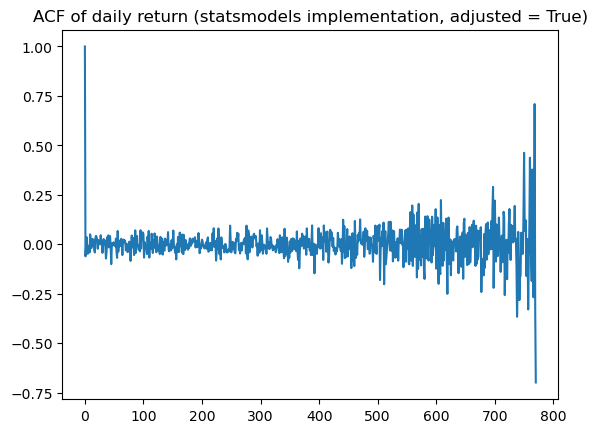

In [77]:
n = len(AEX_data_df_2004_2006.index)
array = acf(AEX_data_df_2004_2006['DailyReturn'], nlags = n-1, adjusted = True)
plt.plot(array)
plt.title('ACF of daily return (statsmodels implementation, adjusted = True)')

Text(0.5, 1.0, 'Histogram of daily return ,bin size = 100')

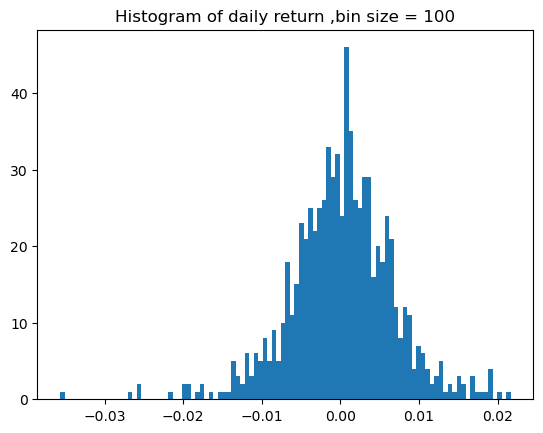

In [78]:
#f)
#plot histogram of daily return
plt.hist(AEX_data_df_2004_2006['DailyReturn'], bins=100)
plt.title('Histogram of daily return ,bin size = 100')

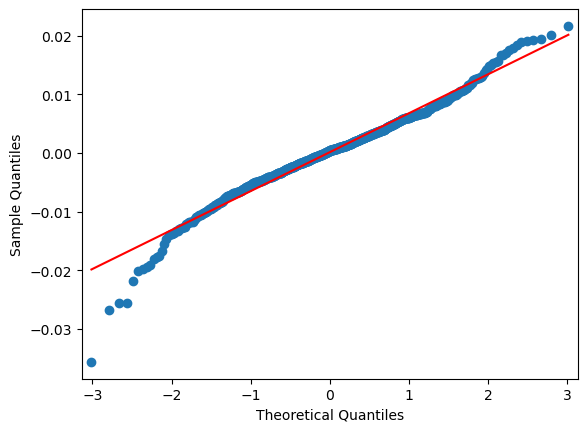

In [80]:
#plot normal qqplot
sm.qqplot(AEX_data_df_2004_2006['DailyReturn'], line='s')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2af6515ed00>,
 'caps': [<matplotlib.lines.Line2D at 0x2af6516e310>,
 'boxes': [<matplotlib.lines.Line2D at 0x2af6514fa00>],
 'medians': [<matplotlib.lines.Line2D at 0x2af6516e8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2af6516eb80>],
 'means': []}

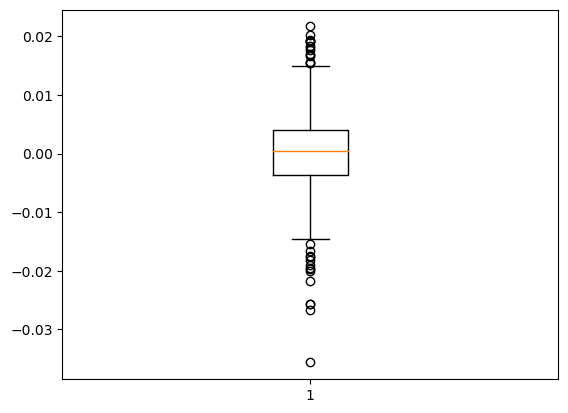

In [81]:
#plot boxplot
plt.boxplot(AEX_data_df_2004_2006['DailyReturn'])

In [82]:
#h) Normal distribution

#MLE estimator of mu
mu = AEX_data_df_2004_2006['DailyReturn'].mean()
#MLE estimator of variance
variance = AEX_data_df_2004_2006['DailyReturn'].var()
#MLE estimator of sigma
sigma = AEX_data_df_2004_2006['DailyReturn'].std()

print('mu = ', mu)
print('variance = ', variance)
print('sigma = ', sigma)

mu =  0.00014624314417639598
variance =  4.4249875837335236e-05
sigma =  0.006652058015181109


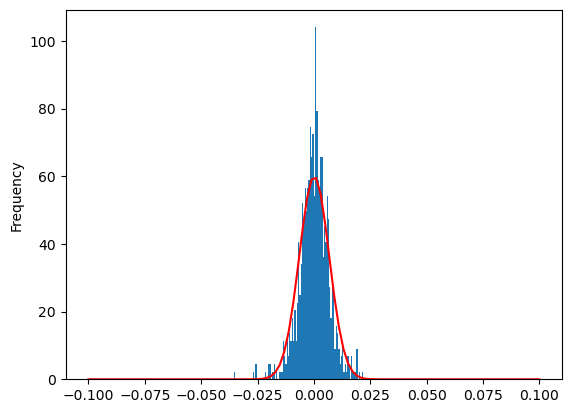

In [83]:
#plot histogram of daily return + density
ax = AEX_data_df_2004_2006['DailyReturn'].plot.hist(bins=100, density=True)
#plot normal distribution
x = np.linspace(-0.1, 0.1, 100)
y = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x-mu)/sigma)**2)
ax.plot(x, y, 'r')

In [84]:
#i) confidence interval
z95 = 1.96
mu = AEX_data_df_2004_2006['DailyReturn'].mean()
sigma = AEX_data_df_2004_2006['DailyReturn'].std()
n = len(AEX_data_df_2004_2006.index)
confidence_interval = [mu-z95*sigma/np.sqrt(n), mu+z95*sigma/np.sqrt(n)]
print('confidence interval = ', confidence_interval)

confidence interval =  [-0.0003233101703649525, 0.0006157964587177444]


In [85]:
#j) probability that the daily return is greater than 0.015
#we use the normal distribution

mu = AEX_data_df_2004_2006['DailyReturn'].mean()
sigma = AEX_data_df_2004_2006['DailyReturn'].std()
x = 0.015
probability = 1-st.norm.cdf(x, mu, sigma)
print('probability = ', probability)

probability =  0.012775903222341234


In [86]:
#k) estimate the probability that the daily return is greater than 0.015 by averaging

count = 0
for daily_return in AEX_data_df_2004_2006['DailyReturn']:
    if daily_return > 0.015:
        count += 1

probability = count/len(AEX_data_df_2004_2006.index)
print('probability = ', probability)

probability =  0.019455252918287938
